In [8]:
library(ggplot2)
library(forcats)
library(purrr)

Warning message:
"le package 'forcats' a été compilé avec la version R 4.5.2"
Warning message:
"le package 'purrr' a été compilé avec la version R 4.5.2"


In [1]:
# Charger les données
df <- read.csv("../../Données/data_cleaned.csv")

In [2]:
# calcul perte totale
df$total_loss <- df$Loss.given.failure...BI..Qm. + df$Loss.given.failure...liab..Qm. + df$Loss.given.failure...prop..Qm.

In [11]:
vars_factor <- c("Region", "Regulated.Dam", "Primary.Purpose", "Primary.Type", "Spillway", "Hazard",
                "Assessment", "Length_missing", "Volume_missing", "n_modifications", "last_modification_year")
df[vars_factor] <- lapply(df[vars_factor], as.factor)
summary(df)

      ID                   Region     Regulated.Dam
 Length:19368       Flumevale :3074   No : 8123    
 Class :character   Lyndrassia:7920   Yes:11245    
 Mode  :character   Navaldia  :8374                
                                                   
                                                   
                                                   
                                                   
                                   Primary.Purpose Primary.Type 
 Recreation                                :4248   Earth:19368  
 Flood Risk Reduction                      :3983                
 Fire Protection, Stock, Or Small Fish Pond:2878                
 Irrigation                                :2822                
 Water Supply                              :2169                
 Unknow                                    : 934                
 (Other)                                   :2334                
   Height..m.       Length..km.        Volume..m3.        Year.C

## Région

In [32]:
graph_region <- function(df, perte, region_var = "Region", bins = 30) {
  regions <- unique(df[[region_var]])
  regions <- regions[!is.na(regions)]

  par(mfrow = c(2, length(regions)), bg = "white", mar = c(4, 4, 3, 1))

  # Boxplots (ligne 1)
  for (reg in regions) {
    x <- df[df[[region_var]] == reg, perte]
    x <- x[!is.na(x)]

    boxplot(
      x,
      main = paste(reg),
      ylab = perte,
      col = "gray85",
      border = "gray40"
    )
  }

  # Histogrammes (ligne 2)
  for (reg in regions) {
    x <- df[df[[region_var]] == reg, perte]
    x <- x[!is.na(x)]

    hist(
      x,
      breaks = bins,
      main = paste(reg),
      xlab = perte,
      col = "steelblue",
      border = "white"
    )
  }
}


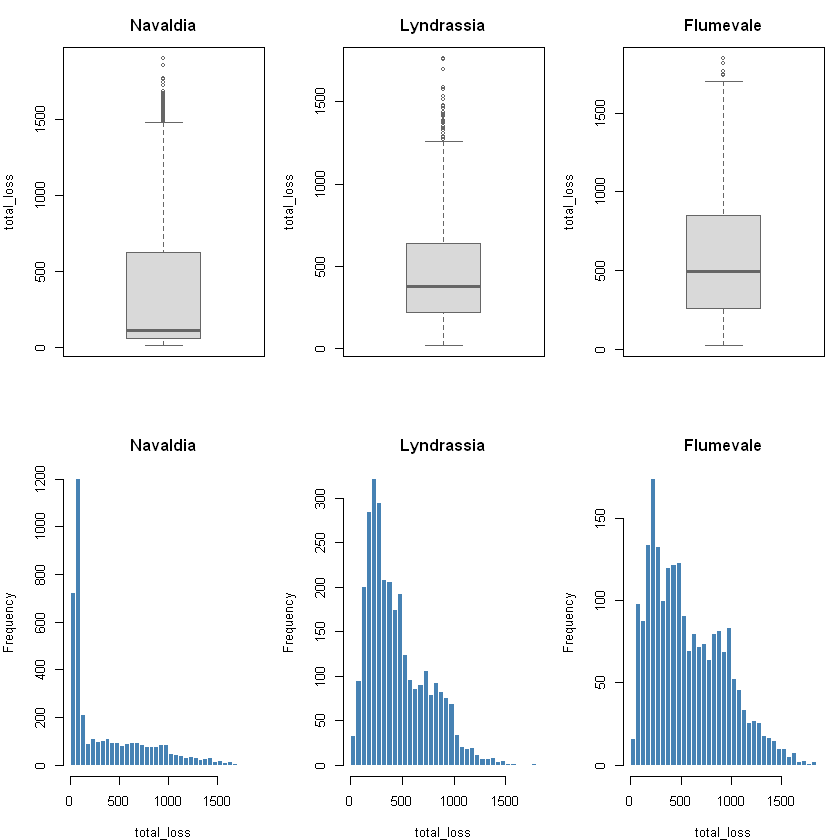

In [33]:
graph_region(df, "total_loss")

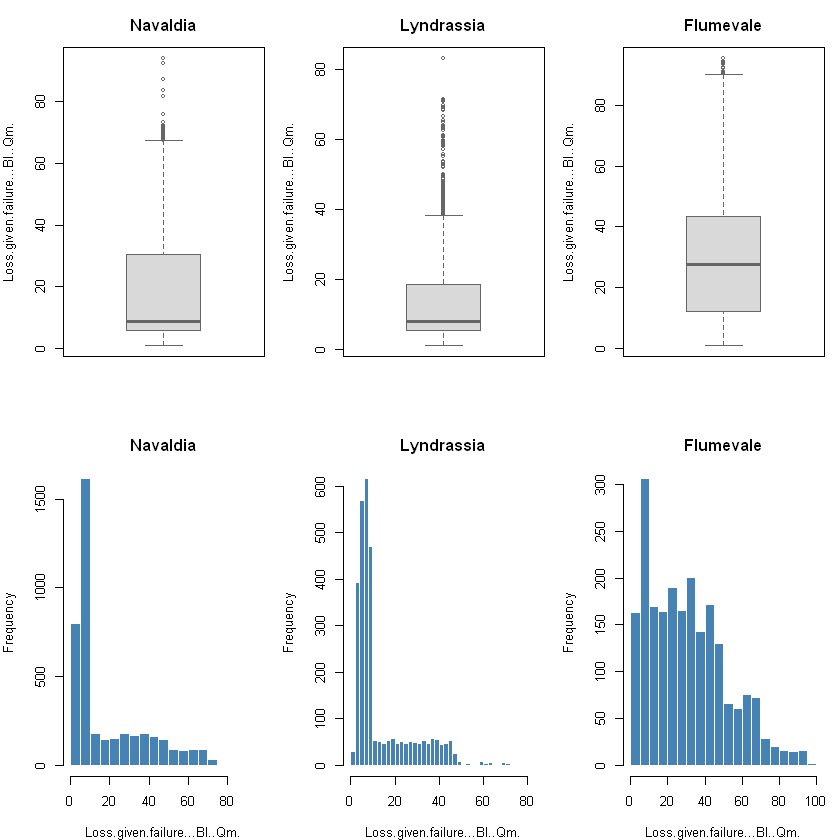

In [34]:
graph_region(df, "Loss.given.failure...BI..Qm.")

Les graphiques montrent que les coûts estimés de réparation en cas de rupture de barrage sont fortement asymétriques, avec une majorité de barrages générant des coûts relativement faibles et quelques cas rares entraînant des pertes très élevées. Cette structure traduit un risque dominé par des événements extrêmes.

Sur le plan régional, Flumevale se distingue par des coûts médians plus élevés et une dispersion plus importante, suggérant des réparations généralement plus coûteuses que dans Navaldia et Lyndrassia, où les coûts sont plus concentrés à des niveaux plus faibles. Toutefois, la présence de valeurs extrêmes dans toutes les régions indique que des réparations très onéreuses restent possibles partout.

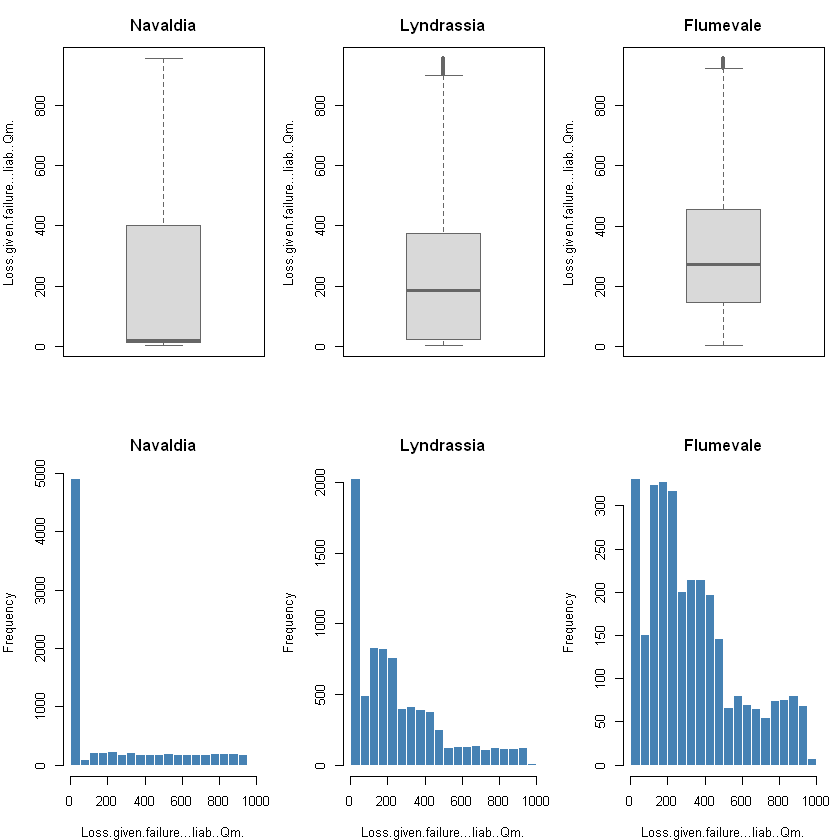

In [35]:
graph_region(df, "Loss.given.failure...liab..Qm.")

Les graphiques indiquent que le coût estimé des dommages causés aux tierces parties, incluant les dommages environnementaux, présente une forte asymétrie dans toutes les régions : la majorité des barrages sont associés à des coûts relativement faibles, tandis que quelques cas rares entraînent des pertes très élevées.

Sur le plan régional, Flumevale affiche les niveaux de coûts les plus élevés, avec une médiane et une dispersion supérieures à celles de Lyndrassia et surtout de Navaldia, où les coûts sont davantage concentrés près de zéro (soit moins d'un million). La présence de valeurs extrêmes dans l’ensemble des régions souligne toutefois que des dommages importants aux tiers demeurent possibles, quel que soit le territoire.

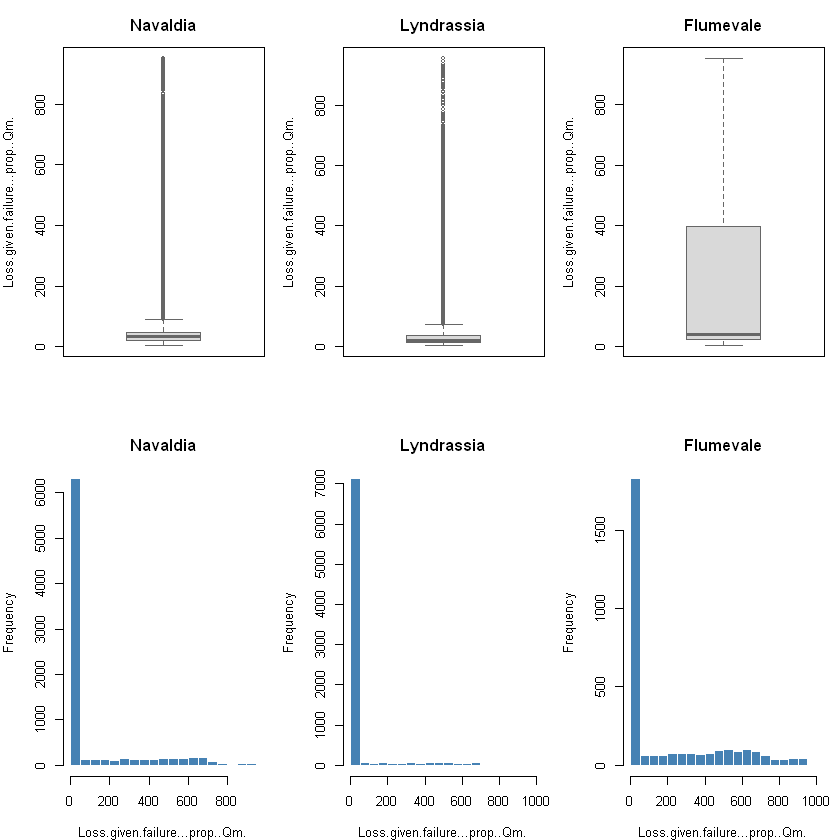

In [37]:
graph_region(df, "Loss.given.failure...prop..Qm.")

Les graphiques montrent que les coûts estimés des revenus annuels perdus dus à l’interruption des affaires sont très fortement concentrés près de zéro (soit moins d'un million) dans Navaldia et Lyndrassia, avec des médianes faibles et une majorité d’observations correspondant à des interruptions limitées ou faibles. Toutefois, la présence de quelques valeurs très élevées indique que, même dans ces régions, des pertes économiques majeures peuvent survenir dans des scénarios extrêmes.

À l’inverse, Flumevale se distingue par une dispersion beaucoup plus large et une médiane plus élevée, suggérant que les interruptions d’activité y entraînent plus fréquemment des pertes substantielles de revenus. Les histogrammes confirment une distribution étalée sur des montants élevés, traduisant une exposition économique plus importante en cas de rupture.

Dans l’ensemble, ces résultats soulignent que les pertes liées à l’interruption des affaires sont dominées par des événements rares mais coûteux, et qu’elles constituent une composante clé du risque économique total, particulièrement dans les régions où l’activité économique dépend fortement des infrastructures hydrauliques.

## Régulation des barrages 

In [57]:
analyse_cat <- function(df, var, perte, region_var = "Region", bins = 30) {
  # Modalités & régions (sans NA)
  modalite <- unique(df[[var]])
  modalite <- modalite[!is.na(modalite)]
  regions <- unique(df[[region_var]])
  regions <- regions[!is.na(regions)]

  # Couleurs 
  cols_mod <- seq_along(modalite) + 1
  cols_reg <- seq_along(regions) + length(modalite) + 2

  op <- par(no.readonly = TRUE)
  on.exit(par(op), add = TRUE)

  ########################################################
  # 1) GLOBAL : par modalité (boxplots + hist)
  ########################################################
  par(bg = "white", mfrow = c(2, length(modalite)), mar = c(4, 4, 3, 1))

  # Boxplots globaux
  for (i in seq_along(modalite)) {
    xi <- df[df[[var]] == modalite[i], perte]
    xi <- xi[!is.na(xi)]

    boxplot(
      xi,
      main = paste(var, "=", modalite[i]),
      ylab = perte,
      col  = cols_mod[i]
    )
  }

  # Hist globaux
  for (i in seq_along(modalite)) {
    xi <- df[df[[var]] == modalite[i], perte]
    xi <- xi[!is.na(xi)]

    hist(
      xi,
      breaks = bins,
      main = paste(var, "=", modalite[i]),
      xlab = perte,
      col  = cols_mod[i],
      border = "white"
    )
  }

  ########################################################
  # 2) PAR MODALITÉ × RÉGION : boxplots + hist
  ########################################################
  for (i in seq_along(modalite)) {
    # Filtrer d’abord la modalité
    df_m <- df[df[[var]] == modalite[i], ]

    par(bg = "white", mfrow = c(2, length(regions)), mar = c(4, 4, 3, 1))
    mtext(paste("Détail par région |", var, "=", modalite[i]), outer = TRUE, line = -1.5)

    # Boxplot par région (pour cette modalité)
    for (j in seq_along(regions)) {
      xij <- df_m[df_m[[region_var]] == regions[j], perte]
      xij <- xij[!is.na(xij)]

      boxplot(
        xij,
        main = paste(regions[j]),
        ylab = perte,
        col  = cols_reg[j]
      )
    }

    # Histogramme par région (pour cette modalité)
    for (j in seq_along(regions)) {
      xij <- df_m[df_m[[region_var]] == regions[j], perte]
      xij <- xij[!is.na(xij)]

      hist(
        xij,
        breaks = bins,
        main = paste(regions[j]),
        xlab = perte,
        col  = cols_reg[j],
        border = "black"
      )
    }
  }
}


In [59]:
pertes <- c("Loss.given.failure...BI..Qm.", "Loss.given.failure...liab..Qm.", "Loss.given.failure...prop..Qm.")

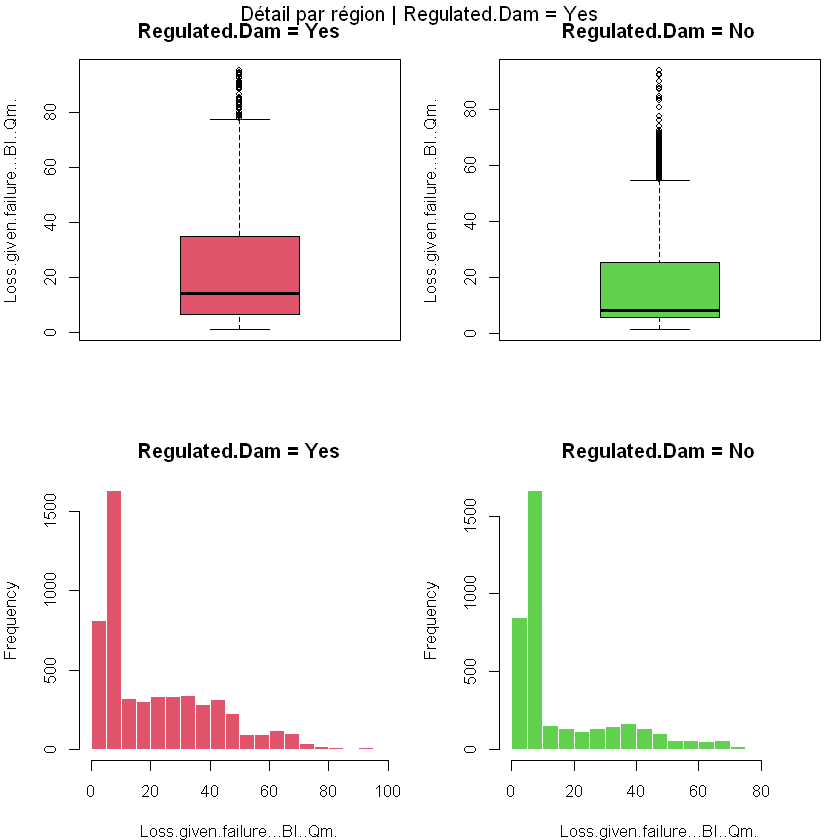

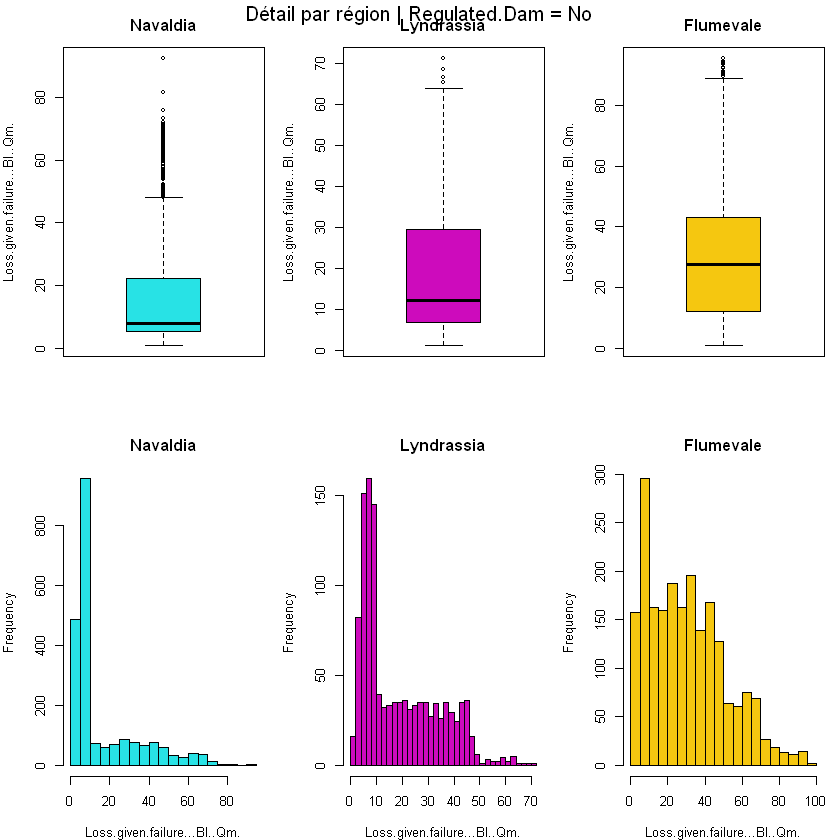

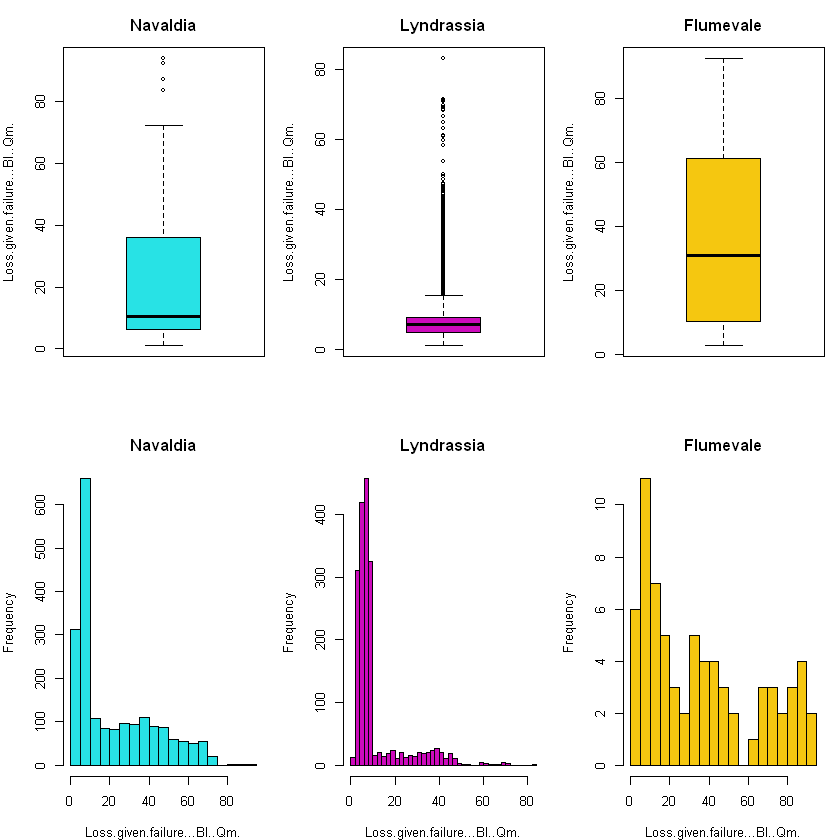

In [60]:
analyse_cat(df, "Regulated.Dam", pertes[1])